## Simple Linear Regression

In this example, we illustrate how to solve a linear regression problem.
Suppose we have training data, can we fit a neural network on it? The trained neural network (an MLP) is then validated on the test split.

Let's load the python packages first.

In [69]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# numpy package
import numpy as np
# for plotting
import matplotlib.pyplot as plt

# keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

### Generate Artificial Data

Assuming we have 1D input and 1D output, let us generate the train data assuminng the underlying function is a polynomial:
\begin{align}
y= f(x) = x^2 - 2x + 1   
\end{align}

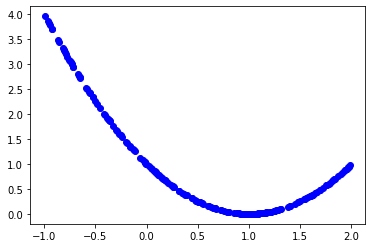

In [70]:
# generate train x data
x_train = np.random.uniform(low=-1.0, high=2.0, size=[200,1])
# generate train y data
y_train = x_train*x_train - 2*x_train + 1

plt.figure()
plt.plot(x_train, y_train, 'bo')

Then, let us generate the test data and plot the train and test data together. Note that the test data is beyond the [-1,2] range of `x_train`. This will enable us to verify if our model can generalize (ie make prediction from never seen before data)

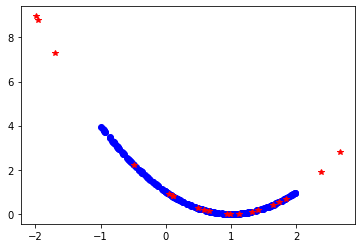

In [83]:
# generate test x data
x_test = np.random.uniform(low=-2.0, high=3.0, size=[20,1])
# generate test y data
y_test = x_test*x_test - 2*x_test + 1

plt.plot(x_train, y_train, 'bo', x_test, y_test, 'r*')
plt.show()

### 3-layer MLP Model

Then, let us build a 3-layer 64-128-1 MLP.

In [84]:
# build 2-layer MLP network 
model = Sequential(name='linear_regressor')
# 1st layer (input layer) has 64 units (perceptron), input is 1-dim
model.add(Dense(units=64, input_dim=1, activation='relu', name='input_layer'))
# 2nd layer has 128 unit, output is 1-dim
model.add(Dense(units=128, activation='relu', name='hidden_layer'))
# 3rd layer (output layer) has 1 unit, output is 1-dim
model.add(Dense(units=1, name='output_layer'))
# print summary to double check the network
model.summary()
# indicate the loss function and use stochastic gradient descent
# (sgd) as optimizer
model.compile(loss='mse', optimizer='sgd')
# feed the network with complete dataset (1 epoch) 100 times
# batch size of sgd is 4
history = model.fit(x_train, y_train, epochs=100, batch_size=4, validation_data=(x_test, y_test))
# simple validation by predicting the output based on x
y_pred = model.predict(x_test, verbose=0)

Model: "linear_regressor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 64)                128       
_________________________________________________________________
hidden_layer (Dense)         (None, 128)               8320      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 129       
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
50/50 [==============================] - 0s 3ms/step - loss: 1.0276 - val_loss: 4.9706
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1931 - val_loss: 2.7254
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0804 - val_loss: 2.2440
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0575 -

50/50 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.5755
Epoch 76/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.5674
Epoch 77/100
50/50 [==============================] - 0s 846us/step - loss: 0.0012 - val_loss: 0.5701
Epoch 78/100
50/50 [==============================] - 0s 900us/step - loss: 0.0012 - val_loss: 0.5657
Epoch 79/100
50/50 [==============================] - 0s 930us/step - loss: 0.0011 - val_loss: 0.5661
Epoch 80/100
50/50 [==============================] - 0s 906us/step - loss: 0.0011 - val_loss: 0.5600
Epoch 81/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.5582
Epoch 82/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.5476
Epoch 83/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.5522
Epoch 84/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.5569
Epoch

### Qualitative Evaluation
Let us plot the prediction (green dots) vs test dataset (red stars).
We can see that the test data deviates largely when the input is beyond the range of the train data.

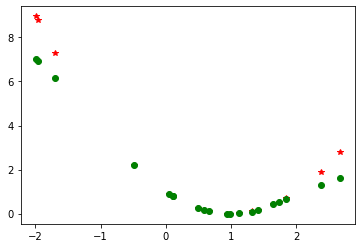

In [85]:
plt.plot(x_test, y_test, 'r*', x_test, y_pred, 'go', )
plt.show()

### Examine the Train History

The `history` variable stores value informationn during training such as value of loss function.

In [86]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


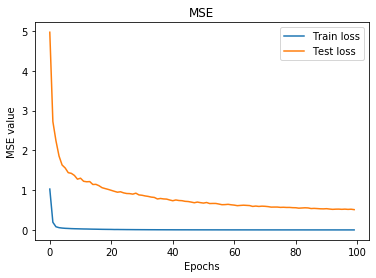

In [88]:
# Plot history: MSE
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()